In [1]:
# define some data
data = np.concatenate([randn(50), (randn(50)+1)])

(array([ 4,  3,  9, 21, 17, 15, 14,  8,  7,  2]),
 array([-1.92446044, -1.4550079 , -0.98555536, -0.51610283, -0.04665029,
        0.42280225,  0.89225478,  1.36170732,  1.83115986,  2.3006124 ,
        2.77006493]),
 <a list of 10 Patch objects>)

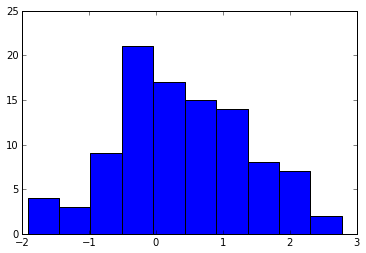

In [2]:
hist(data)

In [3]:
import scipy
import scipy.stats

/Users/adam/virtual-python/lib/python2.7/site-packages/scikits/__init__.py:1: UserWarning: Module argparse was already imported from /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/argparse.pyc, but /Users/adam/virtual-python/lib/python2.7/site-packages is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [4]:
def normalize(data):
    mean = data.mean()
    std = data.std()
    return (data-mean)/std,mean,std

def unnormalize(data,mean,std):
    return (data*std)+mean

In [14]:
# assume a Gaussian model
normed_data,mean,std = normalize(data)
print mean,std
fitmean,fitstd = scipy.stats.norm.fit(normed_data)

0.373246258167 0.986772614432


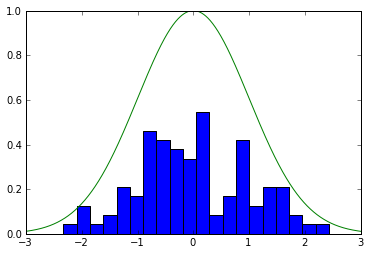

In [12]:
hist(normed_data,bins=20,normed=True)
x = np.linspace(-3,3,1000)
plot(x,np.exp(-(x-fitmean)**2/(2.*fitstd**2)))

In [17]:
unnormed_model = unnormalize( np.exp(-(normed_data-fitmean)**2/(2.*fitstd**2)) , mean, std)

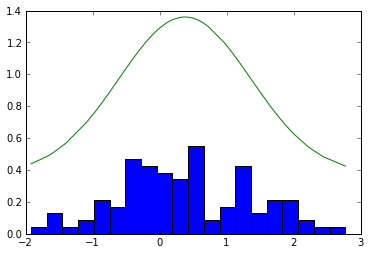

In [18]:
hist(data,bins=20,normed=True)
inds = argsort(data)
plot(data[inds],unnormed_model[inds])